In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
df = pd.read_csv("House Price India.csv")

# Independent variables (all except last column)
X = df.iloc[:, :-1].values

# Dependent variable (last column)
y = df.iloc[:, -1].values

In [3]:
# Feature Scaling (ONLY on X)
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Add intercept (bias) term manually
X = np.c_[np.ones(X.shape[0]), X]

In [4]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# -------- TRAINING (Normal Equation - Manual) --------
Xt = X_train.T
beta = np.linalg.inv(Xt @ X_train) @ Xt @ y_train

# -------- TESTING --------
y_pred = X_test @ beta

In [6]:
# -------- ERROR METRICS (MANUAL) --------

# Least Square Error (LSE)
lse = np.sum((y_test - y_pred) ** 2)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

# R² Score (Manual)
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)

# Print Results
print("Multiple Linear Regression (Manual - Normal Equation)")
print("Intercept (β0):", beta[0])
print("Coefficients (β1 ... βn):", beta[1:])
print("Least Square Error (LSE):", lse)
print("RMSE:", rmse)
print("R² Score:", r2)

Multiple Linear Regression (Manual - Normal Equation)
Intercept (β0): 538192.433247193
Coefficients (β1 ... βn): [ -83584.1379804     -397.32981062 -160324.01074189  -54853.59984282
  171925.99037204   -7943.27524769  -38103.69320232   47607.30618729
   30225.95435758   15197.04692253   57500.93216404  170088.62389496
   28489.95689657  -48067.14758504    5476.26249565   19179.23369463
   23735.2964938   -13299.85271225  -10187.56543638   -9626.13206465
    2187.20547394     442.90881807]
Least Square Error (LSE): 157881402860405.8
RMSE: 232368.25905918443
R² Score: 0.6351591820107189


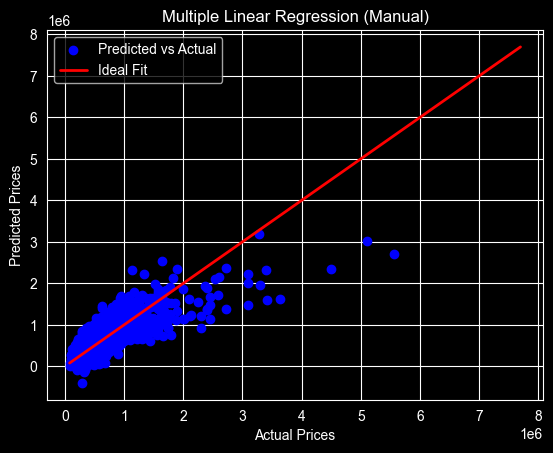

In [7]:
# Visualization: Predicted vs Actual
plt.figure()
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Ideal Fit')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Multiple Linear Regression (Manual)")
plt.legend()
plt.show()